In [1]:
import pandas as pd

df = pd.read_csv('./SO-completo.csv')

df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [2]:
#Verifica se tem NaN
hasNan = df.isnull().sum()
print(hasNan)

Id              0
Title           0
Body            0
Tags            0
CreationDate    0
Y               0
dtype: int64


In [3]:
dfCopy = df.copy()

del dfCopy['Id']
del dfCopy['Title']
del dfCopy['Body']

dfCopy

,Tags,CreationDate,Y
0,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,<java><optional>,2016-01-01 02:03:20,HQ
2,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...
44995,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [4]:
# Mudança de tipos

from sklearn.preprocessing import LabelEncoder

tags = []
quality = []

le = LabelEncoder()
le.fit(dfCopy['Tags'])
dfCopy['Tags'] = le.transform(dfCopy['Tags'])
tags = le.inverse_transform(dfCopy['Tags'])

le.fit(dfCopy['Y'])
dfCopy['Y'] = le.transform(dfCopy['Y'])
quality = le.inverse_transform(dfCopy['Y'])

dfCopy

,Tags,CreationDate,Y
0,12493,2016-01-01 00:21:59,1
1,12330,2016-01-01 02:03:20,0
2,14207,2016-01-01 02:48:24,0
3,24380,2016-01-01 03:30:17,0
4,1632,2016-01-01 05:21:48,0
...,...,...,...
44995,3845,2020-02-29 02:22:18,1
44996,19507,2020-02-29 03:33:59,1
44997,3135,2020-02-29 04:34:16,1
44998,10015,2020-02-29 12:50:43,1


In [5]:
print("Tags: ")
print(tags)

print("Quality: ")
print(quality)

Tags: 
['<java><repeat>' '<java><optional>'
 '<javascript><image><overlay><react-native><opacity>' ...
 '<azure><billing>' '<ios><swift>' '<c#><visual-studio>']
Quality: 
['LQ_CLOSE' 'HQ' 'HQ' ... 'LQ_CLOSE' 'LQ_CLOSE' 'LQ_CLOSE']


<AxesSubplot:>

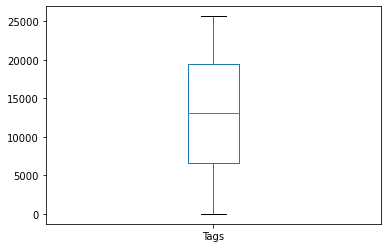

In [11]:
dfCopy['Tags'].plot(kind = 'box')

<AxesSubplot:>

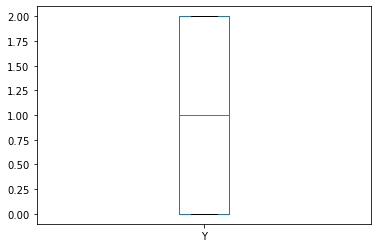

In [12]:
dfCopy['Y'].plot(kind = 'box')

<AxesSubplot:>

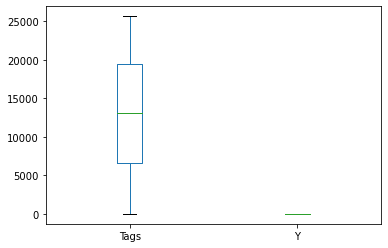

In [10]:
dfCopy[['Tags', 'Y']].plot(kind = 'box')